In [18]:
import pandas as pd

# Load the CSV file
file_path = 'survey_data.csv'
df = pd.read_csv(file_path)

# Filter out non-US respondents based on the column 'What country do you live in?'
# Assuming the United States is referred to as 'United States' in the dataset
non_us_country_df = df[df['What country do you live in?'] != 'United States']

# Check the shape of the new filtered dataframe
print(non_us_country_df.shape)


(12, 44)


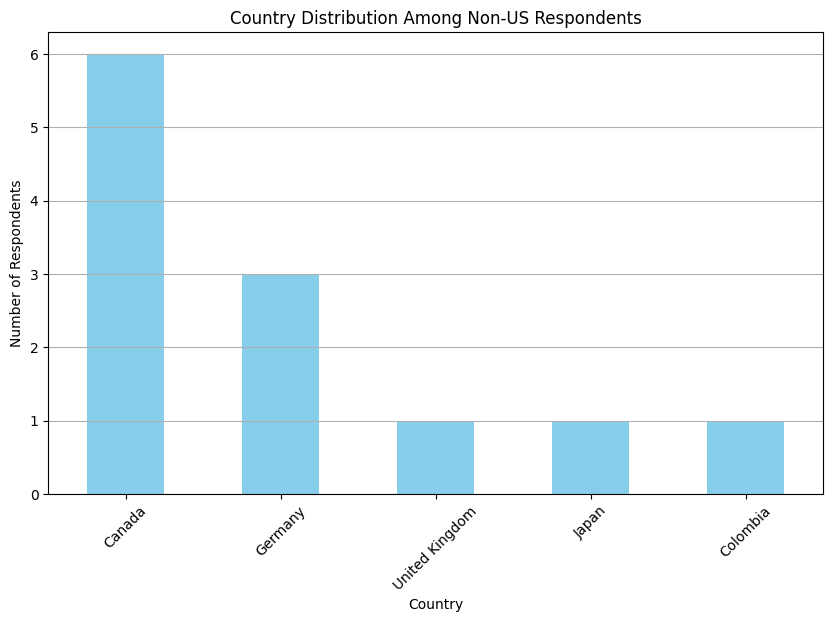

In [19]:
# Filter out non-US respondents based on the column 'What country do you live in?'
# Assuming the United States is referred to as 'United States' in the dataset
non_us_country_df = df[df['What country do you live in?'] != 'United States']

# Analyze the distribution of countries in the non-US dataset
country_distribution = non_us_country_df['What country do you live in?'].value_counts()

# Plotting the country distribution
plt.figure(figsize=(10, 6))
country_distribution.plot(kind='bar', color='skyblue')
plt.title('Country Distribution Among Non-US Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

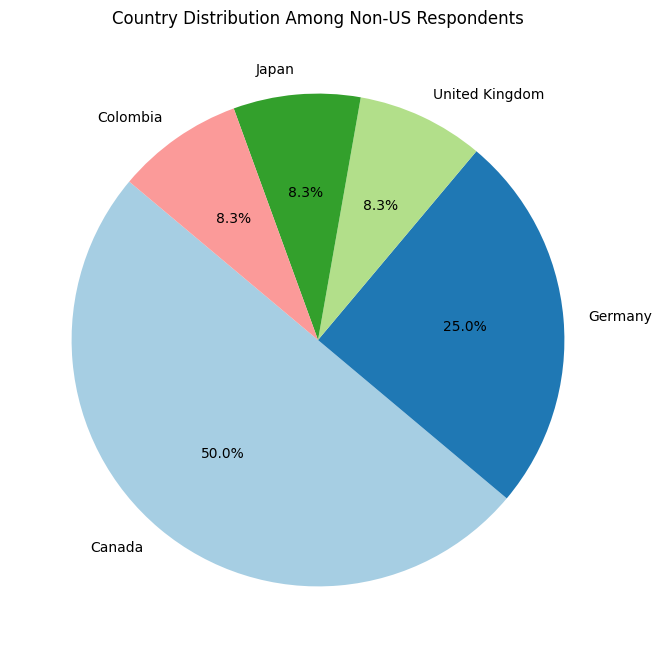

In [20]:
# Filter out non-US respondents based on the column 'What country do you live in?'
# Assuming the United States is referred to as 'United States' in the dataset
non_us_country_df = df[df['What country do you live in?'] != 'United States']

# Analyze the distribution of countries in the non-US dataset
country_distribution = non_us_country_df['What country do you live in?'].value_counts()

# Plotting the country distribution with a pie chart
plt.figure(figsize=(8, 8))
country_distribution.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title('Country Distribution Among Non-US Respondents')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()

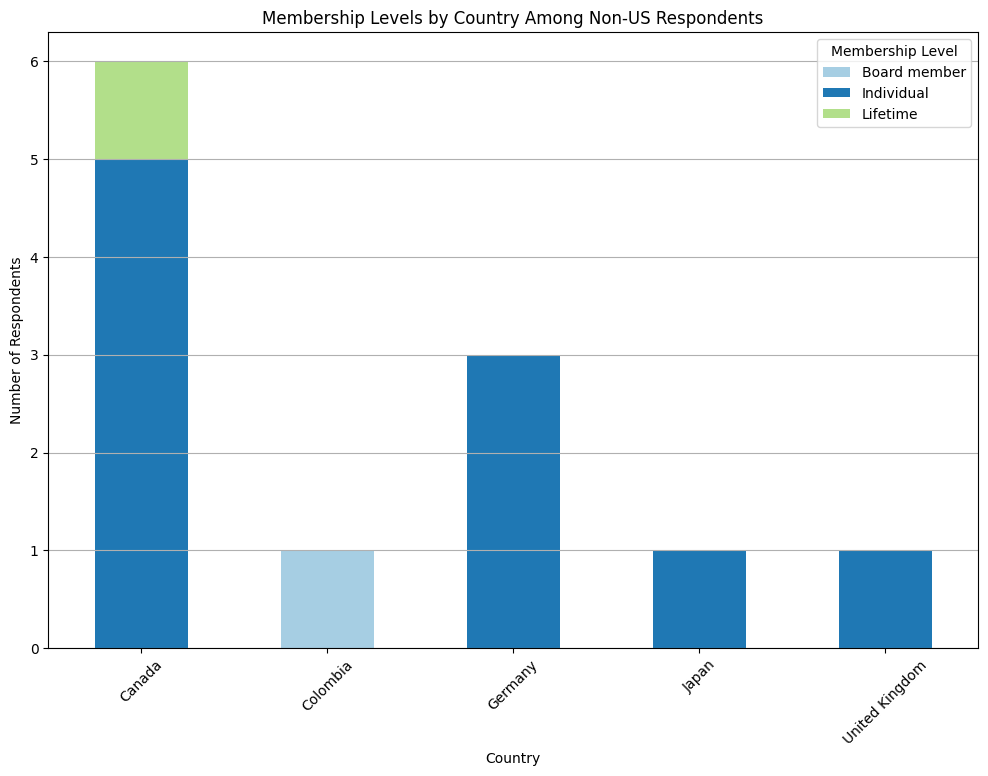

In [21]:

# Filter out non-US respondents based on the column 'What country do you live in?'
# Assuming the United States is referred to as 'United States' in the dataset
non_us_country_df = df[df['What country do you live in?'] != 'United States']

# Analyzing membership levels by country
membership_by_country = non_us_country_df.groupby('What country do you live in?')['Please select your membership level:'].value_counts().unstack()

# Plotting the membership levels by country
membership_by_country.plot(kind='bar', stacked=True, figsize=(12, 8), color=plt.cm.Paired.colors)
plt.title('Membership Levels by Country Among Non-US Respondents')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Membership Level')
plt.grid(axis='y')
plt.show()

/var/folders/zj/vv9845n16zz4tg0n4fd_p0rh0000gn/T/ipykernel_87703/360209889.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  non_us_country_df['When did you first join NAHP/FDH/FDHPM?'] = pd.to_datetime(non_us_country_df['When did you first join NAHP/FDH/FDHPM?'], errors='coerce')
/var/folders/zj/vv9845n16zz4tg0n4fd_p0rh0000gn/T/ipykernel_87703/360209889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_us_country_df['When did you first join NAHP/FDH/FDHPM?'] = pd.to_datetime(non_us_country_df['When did you first join NAHP/FDH/FDHPM?'], errors='coerce')


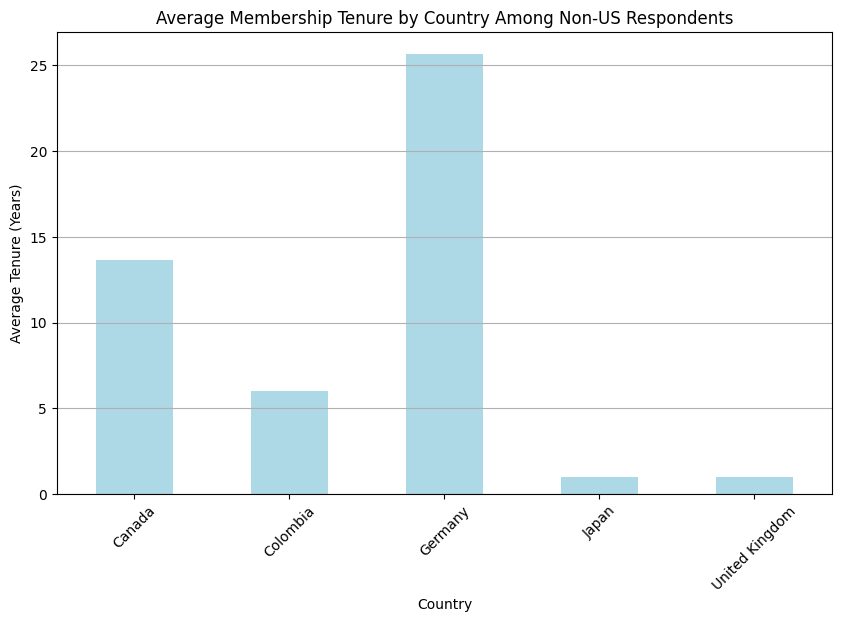

In [22]:
# Filter out non-US respondents based on the column 'What country do you live in?'
non_us_country_df = df[df['What country do you live in?'] != 'United States']

# Ensure the join date is in datetime format
non_us_country_df['When did you first join NAHP/FDH/FDHPM?'] = pd.to_datetime(non_us_country_df['When did you first join NAHP/FDH/FDHPM?'], errors='coerce')

# Drop rows with NaT in join date
non_us_country_df = non_us_country_df.dropna(subset=['When did you first join NAHP/FDH/FDHPM?'])

# Calculate the tenure in years
non_us_country_df['Tenure (Years)'] = 2024 - non_us_country_df['When did you first join NAHP/FDH/FDHPM?'].dt.year

# Group by country and calculate the average tenure
average_tenure_by_country = non_us_country_df.groupby('What country do you live in?')['Tenure (Years)'].mean()

# Plotting average tenure by country
plt.figure(figsize=(10, 6))
average_tenure_by_country.plot(kind='bar', color='lightblue')
plt.title('Average Membership Tenure by Country Among Non-US Respondents')
plt.xlabel('Country')
plt.ylabel('Average Tenure (Years)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()